In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
from fastai.imports import *
from fastai.structured import *

from pandas_summary import DataFrameSummary
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display

from sklearn import metrics

In [3]:
PATH = os.getcwd();
PATH

'D:\\Github\\fastai\\courses\\ml1'

In [4]:
df_raw = pd.read_csv(f'{PATH}\\av_train_DaEJRFg.csv', low_memory=False, parse_dates=['incident_date'])

In [5]:
df_raw.head(1)

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,2012-07-11,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0


In [6]:
df_raw.criticality.value_counts()

0    11255
1      522
Name: criticality, dtype: int64

In [7]:
df_raw.head(3)

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,criticality
0,VIC20120001987267,22:23:19,2012-07-11,Subhash Nagar,Raipur,Multiple Vehicular Incident,13,12,CUR,HIW,FOR,0
1,VIC20110002147887,20:23:09,2011-02-11,Coro Nation,Raipur,2 Wheeler accidents,1,5,CUR,HIW,AGL,0
2,VIC20090001391483,20:37:15,2009-07-25,Kewal Vihar,Raipur,"Non motorised vehicle accidents(Bullock cart,B...",2,2,INT,LOC,HOSP,0


In [24]:
add_datepart(test, 'incident_date')
test.head()

,victim_id,incident_time,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,...,incident_Day,incident_Dayofweek,incident_Dayofyear,incident_Is_month_end,incident_Is_month_start,incident_Is_quarter_end,incident_Is_quarter_start,incident_Is_year_end,incident_Is_year_start,incident_Elapsed
0,VIC20100001032706,15:46:12,Chc Sahaspur,Sahaspur,MVC - Pedestrian (Run Over/Hit & Run),23,27,INT,LOC,MAR,...,19,2,139,False,False,False,False,False,False,1274227200
1,VIC20120000441519,16:55:28,Doiwala Ambulance,Doiwala,Multiple Vehicular Incident,5,21,CUR,HIW,AGL,...,18,6,78,False,False,False,False,False,False,1332028800
2,VIC20130000014119,18:49:35,Race Course Chowk,Raipur,Multiple Vehicular Incident,3,1,CUR,HIW,AGL,...,1,0,91,False,True,False,True,False,False,1364774400
3,VIC20140000614145,16:22:55,Selaqui,Sahaspur,Multiple Vehicular Incident,18,14,UNK,LOC,AGL,...,31,5,151,True,False,False,False,False,False,1401494400
4,VIC20090002298916,15:35:15,"Ambari Mode,Dakpather",Vikasnagar,2 Wheeler accidents,6,10,INT,LOC,MAR,...,12,2,224,False,False,False,False,False,False,1250035200


In [25]:
test.drop('incident_Elapsed', axis=1, inplace=True)

In [26]:
test['incident_location'].fillna('Dehradun',inplace=True)

In [27]:
train_cats(test)

In [115]:
os.makedirs('tmp', exist_ok=True)
df_raw.to_feather('tmp/av_rookree_raw')

In [187]:
test.head(2)

,victim_id,incident_time,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area,...,incident_Week,incident_Day,incident_Dayofweek,incident_Dayofyear,incident_Is_month_end,incident_Is_month_start,incident_Is_quarter_end,incident_Is_quarter_start,incident_Is_year_end,incident_Is_year_start
0,VIC20100001032706,15:46:12,Chc Sahaspur,Sahaspur,MVC - Pedestrian (Run Over/Hit & Run),23,27,INT,LOC,MAR,...,20,19,2,139,False,False,False,False,False,False
1,VIC20120000441519,16:55:28,Doiwala Ambulance,Doiwala,Multiple Vehicular Incident,5,21,CUR,HIW,AGL,...,11,18,6,78,False,False,False,False,False,False


In [188]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 22 columns):
victim_id                     5048 non-null category
incident_time                 5048 non-null category
incident_location             5048 non-null category
incident_tehsil               5048 non-null category
cause_of_emergency            5048 non-null category
base_to_scene_distance        5048 non-null int64
scene_to_hospital_distance    5048 non-null int64
roadway_feature               5048 non-null category
road_type                     5048 non-null category
surrounding_area              5048 non-null category
incident_Year                 5048 non-null int64
incident_Month                5048 non-null int64
incident_Week                 5048 non-null int64
incident_Day                  5048 non-null int64
incident_Dayofweek            5048 non-null int64
incident_Dayofyear            5048 non-null int64
incident_Is_month_end         5048 non-null bool
incident_Is_month_st

In [15]:
y = df_raw.criticality

In [16]:
df_raw.drop('criticality',axis=1,inplace=True)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_validation, y_train, y_validation = train_test_split(df_raw, y, train_size=0.8, random_state=1234)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [18]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11777 entries, 0 to 11776
Data columns (total 22 columns):
victim_id                     11777 non-null category
incident_time                 11777 non-null category
incident_location             11777 non-null category
incident_tehsil               11777 non-null category
cause_of_emergency            11777 non-null category
base_to_scene_distance        11777 non-null int64
scene_to_hospital_distance    11777 non-null int64
roadway_feature               11777 non-null category
road_type                     11777 non-null category
surrounding_area              11777 non-null category
incident_Year                 11777 non-null int64
incident_Month                11777 non-null int64
incident_Week                 11777 non-null int64
incident_Day                  11777 non-null int64
incident_Dayofweek            11777 non-null int64
incident_Dayofyear            11777 non-null int64
incident_Is_month_end         11777 non-null bool
i

In [19]:
categorical_features_indices = np.where(df_raw.dtypes != (np.int64 or np.bool))[0]

In [20]:
categorical_features_indices

array([ 0,  1,  2,  3,  4,  7,  8,  9, 16, 17, 18, 19, 20, 21], dtype=int64)

In [21]:
#importing library and building model
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=1000, depth=13, learning_rate=0.01, loss_function='CrossEntropy',\
                         )
model.fit(X_train, y_train,cat_features=categorical_features_indices,eval_set=(X_validation, y_validation))

0:	learn: 0.6787930	test: 0.6787468	best: 0.6787468 (0)	total: 204ms	remaining: 3m 23s
1:	learn: 0.6652549	test: 0.6651285	best: 0.6651285 (1)	total: 318ms	remaining: 2m 38s
2:	learn: 0.6521447	test: 0.6519880	best: 0.6519880 (2)	total: 342ms	remaining: 1m 53s
3:	learn: 0.6390820	test: 0.6389544	best: 0.6389544 (3)	total: 412ms	remaining: 1m 42s
4:	learn: 0.6266753	test: 0.6265258	best: 0.6265258 (4)	total: 425ms	remaining: 1m 24s
5:	learn: 0.6144091	test: 0.6142177	best: 0.6142177 (5)	total: 467ms	remaining: 1m 17s
6:	learn: 0.6026720	test: 0.6024569	best: 0.6024569 (6)	total: 484ms	remaining: 1m 8s
7:	learn: 0.5912546	test: 0.5910012	best: 0.5910012 (7)	total: 532ms	remaining: 1m 6s
8:	learn: 0.5801494	test: 0.5798758	best: 0.5798758 (8)	total: 542ms	remaining: 59.7s
9:	learn: 0.5693514	test: 0.5690566	best: 0.5690566 (9)	total: 569ms	remaining: 56.3s
10:	learn: 0.5588476	test: 0.5585331	best: 0.5585331 (10)	total: 578ms	remaining: 51.9s
11:	learn: 0.5485114	test: 0.5481499	best: 0.5

94:	learn: 0.2187999	test: 0.2171142	best: 0.2171142 (94)	total: 4.33s	remaining: 41.2s
95:	learn: 0.2174298	test: 0.2157718	best: 0.2157718 (95)	total: 4.36s	remaining: 41.1s
96:	learn: 0.2162001	test: 0.2145409	best: 0.2145409 (96)	total: 4.39s	remaining: 40.9s
97:	learn: 0.2149838	test: 0.2133196	best: 0.2133196 (97)	total: 4.49s	remaining: 41.3s
98:	learn: 0.2136957	test: 0.2120635	best: 0.2120635 (98)	total: 4.68s	remaining: 42.6s
99:	learn: 0.2125096	test: 0.2108782	best: 0.2108782 (99)	total: 4.77s	remaining: 42.9s
100:	learn: 0.2116802	test: 0.2100498	best: 0.2100498 (100)	total: 4.78s	remaining: 42.5s
101:	learn: 0.2103530	test: 0.2088000	best: 0.2088000 (101)	total: 4.87s	remaining: 42.9s
102:	learn: 0.2095695	test: 0.2080174	best: 0.2080174 (102)	total: 4.88s	remaining: 42.5s
103:	learn: 0.2086363	test: 0.2070568	best: 0.2070568 (103)	total: 5s	remaining: 43.1s
104:	learn: 0.2078927	test: 0.2063144	best: 0.2063144 (104)	total: 5.01s	remaining: 42.7s
105:	learn: 0.2070355	tes

186:	learn: 0.1707890	test: 0.1700298	best: 0.1700298 (186)	total: 17s	remaining: 1m 13s
187:	learn: 0.1706104	test: 0.1698478	best: 0.1698478 (187)	total: 17s	remaining: 1m 13s
188:	learn: 0.1704348	test: 0.1696952	best: 0.1696952 (188)	total: 17.1s	remaining: 1m 13s
189:	learn: 0.1701179	test: 0.1694386	best: 0.1694386 (189)	total: 17.2s	remaining: 1m 13s
190:	learn: 0.1698577	test: 0.1691917	best: 0.1691917 (190)	total: 17.3s	remaining: 1m 13s
191:	learn: 0.1696792	test: 0.1690140	best: 0.1690140 (191)	total: 17.4s	remaining: 1m 13s
192:	learn: 0.1695128	test: 0.1688522	best: 0.1688522 (192)	total: 17.4s	remaining: 1m 12s
193:	learn: 0.1693406	test: 0.1686727	best: 0.1686727 (193)	total: 17.4s	remaining: 1m 12s
194:	learn: 0.1690332	test: 0.1684541	best: 0.1684541 (194)	total: 17.7s	remaining: 1m 13s
195:	learn: 0.1688289	test: 0.1682439	best: 0.1682439 (195)	total: 17.8s	remaining: 1m 12s
196:	learn: 0.1686071	test: 0.1680278	best: 0.1680278 (196)	total: 17.8s	remaining: 1m 12s
197

277:	learn: 0.1576463	test: 0.1600953	best: 0.1600953 (277)	total: 55.3s	remaining: 2m 23s
278:	learn: 0.1575568	test: 0.1600105	best: 0.1600105 (278)	total: 55.5s	remaining: 2m 23s
279:	learn: 0.1575522	test: 0.1600063	best: 0.1600063 (279)	total: 55.5s	remaining: 2m 22s
280:	learn: 0.1574822	test: 0.1599371	best: 0.1599371 (280)	total: 55.5s	remaining: 2m 22s
281:	learn: 0.1574281	test: 0.1598972	best: 0.1598972 (281)	total: 55.6s	remaining: 2m 21s
282:	learn: 0.1572938	test: 0.1598103	best: 0.1598103 (282)	total: 55.8s	remaining: 2m 21s
283:	learn: 0.1572765	test: 0.1598130	best: 0.1598103 (282)	total: 55.8s	remaining: 2m 20s
284:	learn: 0.1572323	test: 0.1597714	best: 0.1597714 (284)	total: 55.8s	remaining: 2m 20s
285:	learn: 0.1572162	test: 0.1597561	best: 0.1597561 (285)	total: 55.9s	remaining: 2m 19s
286:	learn: 0.1571401	test: 0.1597218	best: 0.1597218 (286)	total: 56s	remaining: 2m 19s
287:	learn: 0.1569386	test: 0.1596601	best: 0.1596601 (287)	total: 58.5s	remaining: 2m 24s
2

367:	learn: 0.1499747	test: 0.1567891	best: 0.1567891 (367)	total: 2m 16s	remaining: 3m 54s
368:	learn: 0.1498791	test: 0.1567929	best: 0.1567891 (367)	total: 2m 17s	remaining: 3m 55s
369:	learn: 0.1497288	test: 0.1567891	best: 0.1567891 (367)	total: 2m 19s	remaining: 3m 58s
370:	learn: 0.1496964	test: 0.1567860	best: 0.1567860 (370)	total: 2m 20s	remaining: 3m 57s
371:	learn: 0.1496078	test: 0.1567090	best: 0.1567090 (371)	total: 2m 20s	remaining: 3m 56s
372:	learn: 0.1495964	test: 0.1566995	best: 0.1566995 (372)	total: 2m 20s	remaining: 3m 55s
373:	learn: 0.1494394	test: 0.1566299	best: 0.1566299 (373)	total: 2m 20s	remaining: 3m 55s
374:	learn: 0.1492875	test: 0.1565871	best: 0.1565871 (374)	total: 2m 23s	remaining: 3m 58s
375:	learn: 0.1492261	test: 0.1565407	best: 0.1565407 (375)	total: 2m 23s	remaining: 3m 57s
376:	learn: 0.1491524	test: 0.1564909	best: 0.1564909 (376)	total: 2m 23s	remaining: 3m 56s
377:	learn: 0.1491492	test: 0.1564861	best: 0.1564861 (377)	total: 2m 23s	remain

457:	learn: 0.1445303	test: 0.1555645	best: 0.1555395 (455)	total: 3m 32s	remaining: 4m 11s
458:	learn: 0.1444077	test: 0.1555367	best: 0.1555367 (458)	total: 3m 35s	remaining: 4m 13s
459:	learn: 0.1443389	test: 0.1554962	best: 0.1554962 (459)	total: 3m 38s	remaining: 4m 16s
460:	learn: 0.1443211	test: 0.1554929	best: 0.1554929 (460)	total: 3m 38s	remaining: 4m 15s
461:	learn: 0.1442562	test: 0.1555139	best: 0.1554929 (460)	total: 3m 38s	remaining: 4m 14s
462:	learn: 0.1442487	test: 0.1555094	best: 0.1554929 (460)	total: 3m 38s	remaining: 4m 13s
463:	learn: 0.1442378	test: 0.1555072	best: 0.1554929 (460)	total: 3m 38s	remaining: 4m 12s
464:	learn: 0.1441893	test: 0.1554908	best: 0.1554908 (464)	total: 3m 38s	remaining: 4m 11s
465:	learn: 0.1441427	test: 0.1554892	best: 0.1554892 (465)	total: 3m 39s	remaining: 4m 11s
466:	learn: 0.1440638	test: 0.1554075	best: 0.1554075 (466)	total: 3m 39s	remaining: 4m 10s
467:	learn: 0.1440460	test: 0.1554163	best: 0.1554075 (466)	total: 3m 39s	remain

547:	learn: 0.1403960	test: 0.1549075	best: 0.1549033 (545)	total: 4m 46s	remaining: 3m 55s
548:	learn: 0.1403554	test: 0.1549034	best: 0.1549033 (545)	total: 4m 47s	remaining: 3m 56s
549:	learn: 0.1402844	test: 0.1549279	best: 0.1549033 (545)	total: 4m 48s	remaining: 3m 55s
550:	learn: 0.1402835	test: 0.1549264	best: 0.1549033 (545)	total: 4m 48s	remaining: 3m 54s
551:	learn: 0.1401893	test: 0.1549253	best: 0.1549033 (545)	total: 4m 49s	remaining: 3m 55s
552:	learn: 0.1401302	test: 0.1549000	best: 0.1549000 (552)	total: 4m 49s	remaining: 3m 54s
553:	learn: 0.1401098	test: 0.1548900	best: 0.1548900 (553)	total: 4m 49s	remaining: 3m 53s
554:	learn: 0.1401081	test: 0.1548898	best: 0.1548898 (554)	total: 4m 50s	remaining: 3m 52s
555:	learn: 0.1400222	test: 0.1548854	best: 0.1548854 (555)	total: 4m 52s	remaining: 3m 53s
556:	learn: 0.1399911	test: 0.1548798	best: 0.1548798 (556)	total: 4m 52s	remaining: 3m 52s
557:	learn: 0.1398880	test: 0.1548840	best: 0.1548798 (556)	total: 4m 55s	remain

637:	learn: 0.1362172	test: 0.1543451	best: 0.1543451 (637)	total: 6m 5s	remaining: 3m 27s
638:	learn: 0.1362083	test: 0.1543480	best: 0.1543451 (637)	total: 6m 6s	remaining: 3m 26s
639:	learn: 0.1362081	test: 0.1543472	best: 0.1543451 (637)	total: 6m 6s	remaining: 3m 25s
640:	learn: 0.1361990	test: 0.1543411	best: 0.1543411 (640)	total: 6m 6s	remaining: 3m 25s
641:	learn: 0.1361068	test: 0.1543345	best: 0.1543345 (641)	total: 6m 6s	remaining: 3m 24s
642:	learn: 0.1360391	test: 0.1543226	best: 0.1543226 (642)	total: 6m 9s	remaining: 3m 25s
643:	learn: 0.1360389	test: 0.1543218	best: 0.1543218 (643)	total: 6m 9s	remaining: 3m 24s
644:	learn: 0.1360302	test: 0.1543259	best: 0.1543218 (643)	total: 6m 9s	remaining: 3m 23s
645:	learn: 0.1359518	test: 0.1542955	best: 0.1542955 (645)	total: 6m 11s	remaining: 3m 23s
646:	learn: 0.1358641	test: 0.1543031	best: 0.1542955 (645)	total: 6m 14s	remaining: 3m 24s
647:	learn: 0.1357446	test: 0.1542817	best: 0.1542817 (647)	total: 6m 15s	remaining: 3m 

727:	learn: 0.1326263	test: 0.1539375	best: 0.1538871 (712)	total: 7m 32s	remaining: 2m 48s
728:	learn: 0.1325864	test: 0.1539285	best: 0.1538871 (712)	total: 7m 34s	remaining: 2m 49s
729:	learn: 0.1325826	test: 0.1539245	best: 0.1538871 (712)	total: 7m 35s	remaining: 2m 48s
730:	learn: 0.1325773	test: 0.1539199	best: 0.1538871 (712)	total: 7m 35s	remaining: 2m 47s
731:	learn: 0.1325338	test: 0.1539181	best: 0.1538871 (712)	total: 7m 35s	remaining: 2m 46s
732:	learn: 0.1324823	test: 0.1538800	best: 0.1538800 (732)	total: 7m 35s	remaining: 2m 45s
733:	learn: 0.1323733	test: 0.1538734	best: 0.1538734 (733)	total: 7m 38s	remaining: 2m 46s
734:	learn: 0.1323078	test: 0.1538720	best: 0.1538720 (734)	total: 7m 41s	remaining: 2m 46s
735:	learn: 0.1323062	test: 0.1538716	best: 0.1538716 (735)	total: 7m 41s	remaining: 2m 45s
736:	learn: 0.1322545	test: 0.1538797	best: 0.1538716 (735)	total: 7m 43s	remaining: 2m 45s
737:	learn: 0.1322446	test: 0.1538809	best: 0.1538716 (735)	total: 7m 43s	remain

817:	learn: 0.1284582	test: 0.1538540	best: 0.1537416 (803)	total: 9m 15s	remaining: 2m 3s
818:	learn: 0.1283915	test: 0.1538592	best: 0.1537416 (803)	total: 9m 17s	remaining: 2m 3s
819:	learn: 0.1282762	test: 0.1538299	best: 0.1537416 (803)	total: 9m 21s	remaining: 2m 3s
820:	learn: 0.1282252	test: 0.1538308	best: 0.1537416 (803)	total: 9m 23s	remaining: 2m 2s
821:	learn: 0.1281739	test: 0.1538092	best: 0.1537416 (803)	total: 9m 26s	remaining: 2m 2s
822:	learn: 0.1281448	test: 0.1538158	best: 0.1537416 (803)	total: 9m 26s	remaining: 2m 1s
823:	learn: 0.1280310	test: 0.1538356	best: 0.1537416 (803)	total: 9m 29s	remaining: 2m 1s
824:	learn: 0.1279499	test: 0.1538160	best: 0.1537416 (803)	total: 9m 32s	remaining: 2m 1s
825:	learn: 0.1278271	test: 0.1537776	best: 0.1537416 (803)	total: 9m 34s	remaining: 2m 1s
826:	learn: 0.1277197	test: 0.1537569	best: 0.1537416 (803)	total: 9m 36s	remaining: 2m
827:	learn: 0.1277182	test: 0.1537567	best: 0.1537416 (803)	total: 9m 36s	remaining: 1m 59s
8

906:	learn: 0.1229736	test: 0.1536933	best: 0.1536551 (849)	total: 11m 58s	remaining: 1m 13s
907:	learn: 0.1229423	test: 0.1537027	best: 0.1536551 (849)	total: 11m 59s	remaining: 1m 12s
908:	learn: 0.1227716	test: 0.1536827	best: 0.1536551 (849)	total: 12m 2s	remaining: 1m 12s
909:	learn: 0.1225520	test: 0.1536817	best: 0.1536551 (849)	total: 12m 4s	remaining: 1m 11s
910:	learn: 0.1224290	test: 0.1536943	best: 0.1536551 (849)	total: 12m 7s	remaining: 1m 11s
911:	learn: 0.1223590	test: 0.1536892	best: 0.1536551 (849)	total: 12m 10s	remaining: 1m 10s
912:	learn: 0.1222613	test: 0.1536831	best: 0.1536551 (849)	total: 12m 13s	remaining: 1m 9s
913:	learn: 0.1221591	test: 0.1536831	best: 0.1536551 (849)	total: 12m 16s	remaining: 1m 9s
914:	learn: 0.1221025	test: 0.1536944	best: 0.1536551 (849)	total: 12m 19s	remaining: 1m 8s
915:	learn: 0.1220523	test: 0.1536935	best: 0.1536551 (849)	total: 12m 22s	remaining: 1m 8s
916:	learn: 0.1219369	test: 0.1537065	best: 0.1536551 (849)	total: 12m 25s	re

996:	learn: 0.1152458	test: 0.1534024	best: 0.1533056 (977)	total: 15m 50s	remaining: 2.86s
997:	learn: 0.1151724	test: 0.1533871	best: 0.1533056 (977)	total: 15m 53s	remaining: 1.91s
998:	learn: 0.1150877	test: 0.1534009	best: 0.1533056 (977)	total: 15m 56s	remaining: 958ms
999:	learn: 0.1150566	test: 0.1534112	best: 0.1533056 (977)	total: 15m 59s	remaining: 0us

bestTest = 0.1533056093
bestIteration = 977



In [22]:
test = pd.read_csv(f'{PATH}\\av_test_TQDFDgg.csv', low_memory=False, parse_dates=['incident_date'])

In [23]:
test.head(3)

,victim_id,incident_time,incident_date,incident_location,incident_tehsil,cause_of_emergency,base_to_scene_distance,scene_to_hospital_distance,roadway_feature,road_type,surrounding_area
0,VIC20100001032706,15:46:12,2010-05-19,Chc Sahaspur,Sahaspur,MVC - Pedestrian (Run Over/Hit & Run),23,27,INT,LOC,MAR
1,VIC20120000441519,16:55:28,2012-03-18,Doiwala Ambulance,Doiwala,Multiple Vehicular Incident,5,21,CUR,HIW,AGL
2,VIC20130000014119,18:49:35,2013-04-01,Race Course Chowk,Raipur,Multiple Vehicular Incident,3,1,CUR,HIW,AGL


In [28]:
prediction_proba = model.predict_proba(test)

In [29]:
model.get_feature_importance(X_train,y_train,cat_features=categorical_features_indices)

[0.0,
 1.1129709561865988,
 4.4016411556994965,
 6.1345647175531255,
 6.998560673937555,
 5.972310613916887,
 37.423568482713634,
 3.0380239859691693,
 1.622082743095675,
 3.1978542547884197,
 10.258152030191379,
 1.7966032786782968,
 2.3300737146483876,
 3.7255273601526704,
 3.442680584435092,
 3.327519385745386,
 0.8214413430669426,
 1.12442581884976,
 0.9372256309116047,
 0.9277285753608542,
 0.796284940893562,
 0.6107597532055076]

In [30]:
prediction_proba[:,1]

array([ 0.06831,  0.05915,  0.01654, ...,  0.03902,  0.0543 ,  0.04739])

In [31]:
def make_submission(probs):
    sample = pd.read_csv(f'{PATH}//av_sample_submission_n2Tyn0h.csv')
    submit = sample.copy()
    submit['criticality'] = probs
    return submit

In [33]:
submit = make_submission(prediction_proba[:,1])

In [34]:
submit.head(2)

,victim_id,criticality
0,VIC20100001032706,0.068305
1,VIC20120000441519,0.059148


In [35]:
submit.to_csv(PATH + 'av_cat_2.csv', index=False)

In [5]:
sub1 = pd.read_csv(PATH + 'av_cat_.csv')

In [6]:
sub2 = pd.read_csv(PATH + 'av_cat_2.csv')

In [ ]:
sub3 = pd.read_csv(PATH)

In [7]:
sub1.head(1)

,victim_id,criticality
0,VIC20100001032706,0.069681


In [8]:
sub2.head(2)

,victim_id,criticality
0,VIC20100001032706,0.068305
1,VIC20120000441519,0.059148


In [9]:
pred1 = sub1['criticality'];
pred2 = sub2['criticality'];

In [11]:
pred3 = (.4*pred1 + .6*pred2)/2.

In [12]:
sub1['criticality'] = pred3

In [13]:
sub1.to_csv(PATH + 'av_cat_1_2_.csv', index=False)

### gridcv

In [204]:
from sklearn.ensemble import GradientBoostingClassifier  #GBM algorithm
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [209]:
def modelfit(alg, dtrain, predictors, performCV=True, printFeatureImportance=True, cv_folds=5):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], y)
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
    
    #Perform cross-validation:
    if performCV:
        cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], y, cv=cv_folds, scoring='roc_auc')
    
    #Print model report:
    print ("\nModel Report")
    print ("Accuracy : %.4g" % metrics.accuracy_score(y , dtrain_predictions))
    print ("AUC Score (Train): %f" % metrics.roc_auc_score(y , dtrain_predprob))
    
    if performCV:
        print ("CV Score : Mean - %.7g | Std - %.7g | Min - %.7g | Max - %.7g" % (np.mean(cv_score),np.std(cv_score),np.min(cv_score),np.max(cv_score)))
        
    #Print Feature Importance:
    if printFeatureImportance:
        feat_imp = pd.Series(alg.feature_importances_, predictors).sort_values(ascending=False)
        plt.figure(figsize=(20,20))
        feat_imp.plot(kind='bar', title='Feature Importances')
        plt.ylabel('Feature Importance Score')


Model Report
Accuracy : 0.9603
AUC Score (Train): 0.870501
CV Score : Mean - 0.7950892 | Std - 0.02467951 | Min - 0.7703814 | Max - 0.8424375


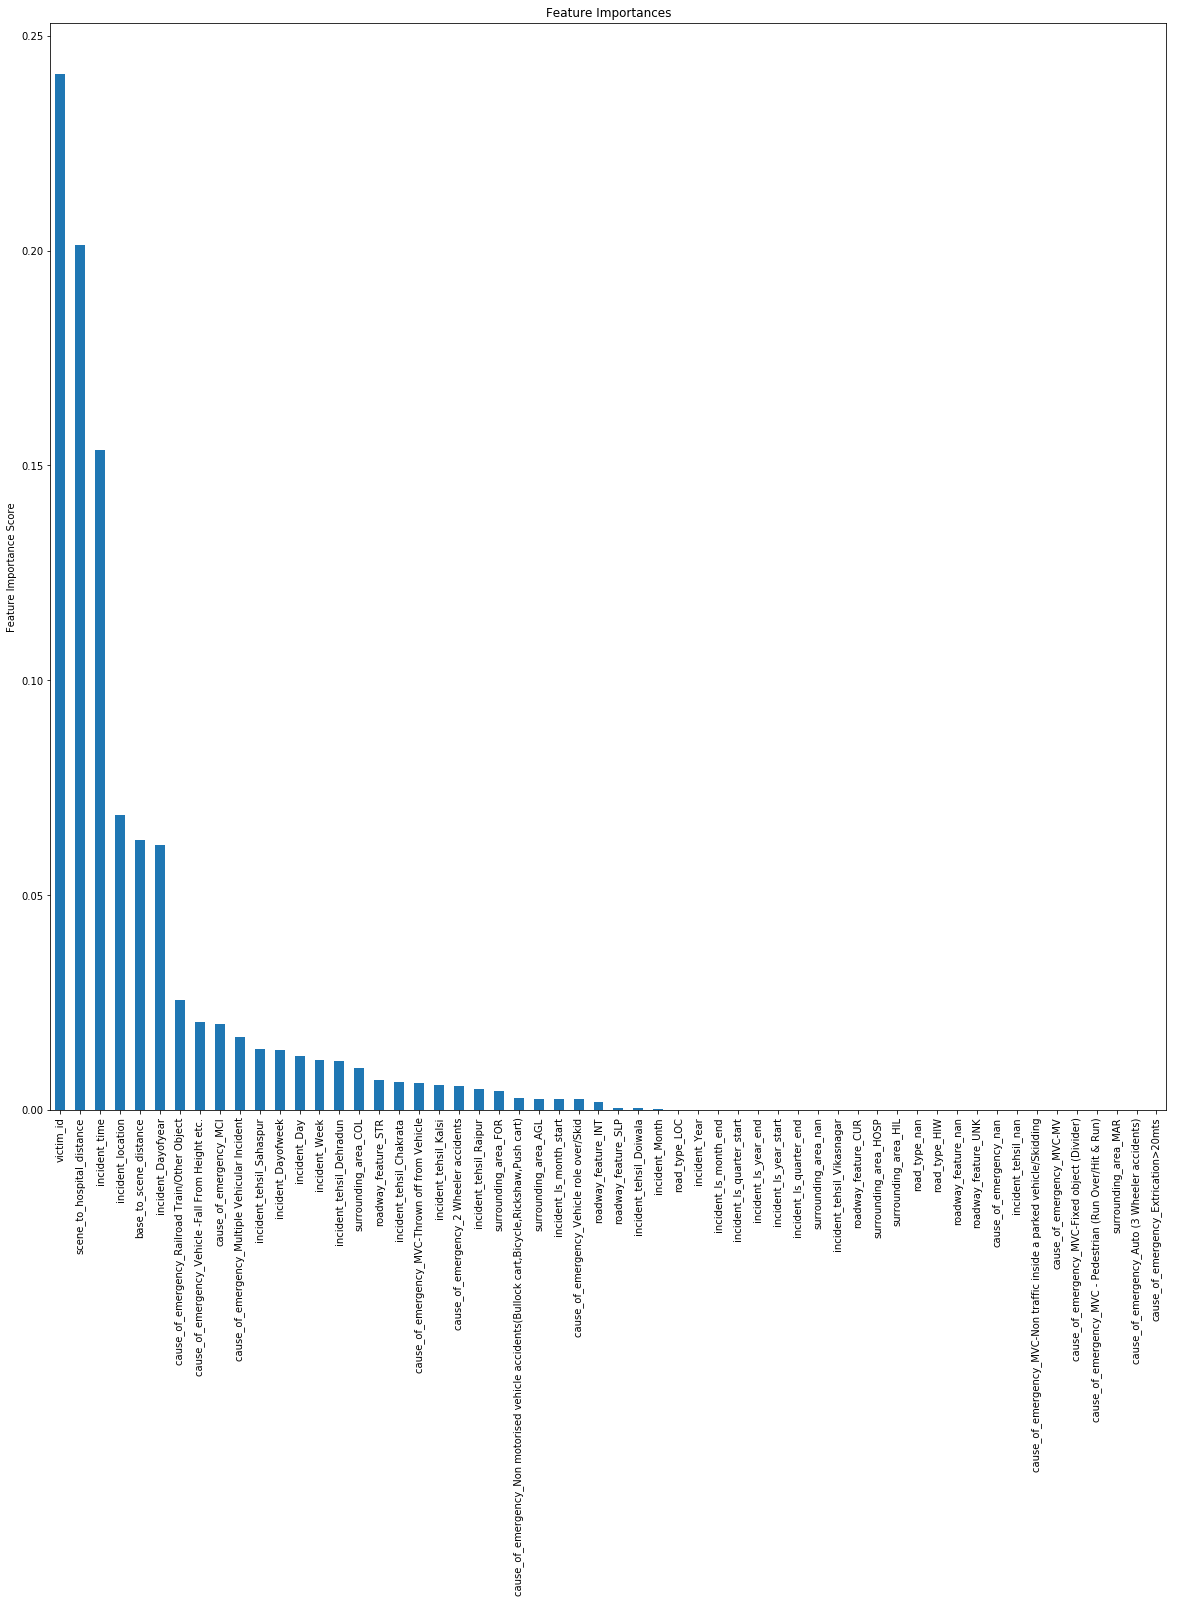

In [210]:
#Choose all predictors except target & IDcols
predictors = df.columns
gbm0 = GradientBoostingClassifier(random_state=10)
modelfit(gbm0, df, predictors)

In [212]:
param_test1 = {'n_estimators':[20, 30, 40, 50, 60, 70, 80, 90]}
gsearch1 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split=500,
                        min_samples_leaf=50,max_depth=8,max_features='sqrt',subsample=0.8,random_state=10), 
                        param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(df[predictors], y)

GridSearchCV(cv=5, error_score='raise',
       estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.05, loss='deviance', max_depth=8,
              max_features='sqrt', max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=50, min_samples_split=500,
              min_weight_fraction_leaf=0.0, n_estimators=100,
              presort='auto', random_state=10, subsample=0.8, verbose=0,
              warm_start=False),
       fit_params={}, iid=False, n_jobs=4,
       param_grid={'n_estimators': [20, 30, 40, 50, 60, 70, 80, 90]},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [213]:
gsearch1.grid_scores_, gsearch1.best_params_, gsearch1.best_score_

([mean: 0.76812, std: 0.02706, params: {'n_estimators': 20},
  mean: 0.77004, std: 0.02740, params: {'n_estimators': 30},
  mean: 0.77381, std: 0.02709, params: {'n_estimators': 40},
  mean: 0.77702, std: 0.02671, params: {'n_estimators': 50},
  mean: 0.78037, std: 0.02678, params: {'n_estimators': 60},
  mean: 0.78425, std: 0.02559, params: {'n_estimators': 70},
  mean: 0.78591, std: 0.02616, params: {'n_estimators': 80},
  mean: 0.78726, std: 0.02711, params: {'n_estimators': 90}],
 {'n_estimators': 90},
 0.7872580277711331)

In [215]:
## Test 2
param_test2 = {'max_depth':[5, 7, 9, 11, 13, 15] ,'min_samples_split': [200, 400, 600, 800, 1000]}
gsearch2 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=90, max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test2, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [216]:
gsearch2.fit(df[predictors], y)
gsearch2.grid_scores_, gsearch2.best_params_, gsearch2.best_score_

([mean: 0.78051, std: 0.02758, params: {'max_depth': 5, 'min_samples_split': 200},
  mean: 0.78206, std: 0.02766, params: {'max_depth': 5, 'min_samples_split': 400},
  mean: 0.78349, std: 0.02935, params: {'max_depth': 5, 'min_samples_split': 600},
  mean: 0.78399, std: 0.03035, params: {'max_depth': 5, 'min_samples_split': 800},
  mean: 0.78113, std: 0.02870, params: {'max_depth': 5, 'min_samples_split': 1000},
  mean: 0.78132, std: 0.03128, params: {'max_depth': 7, 'min_samples_split': 200},
  mean: 0.78252, std: 0.02891, params: {'max_depth': 7, 'min_samples_split': 400},
  mean: 0.78477, std: 0.02503, params: {'max_depth': 7, 'min_samples_split': 600},
  mean: 0.78607, std: 0.02890, params: {'max_depth': 7, 'min_samples_split': 800},
  mean: 0.78567, std: 0.02563, params: {'max_depth': 7, 'min_samples_split': 1000},
  mean: 0.78175, std: 0.03052, params: {'max_depth': 9, 'min_samples_split': 200},
  mean: 0.78102, std: 0.02997, params: {'max_depth': 9, 'min_samples_split': 400},
  

In [217]:
#test 3
param_test3 = {'min_samples_split': [800, 1000, 1200, 1400, 1600] , 'min_samples_leaf': [30, 40, 50, 60, 70]}
gsearch3 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, n_estimators=90,\
                                    max_depth=7,max_features='sqrt', subsample=0.8, random_state=10), 
param_grid = param_test3, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [ ]:
gsearch3.fit(df[predictors], y)

In [222]:
gsearch3.grid_scores_, gsearch3.best_params_, gsearch3.best_score_

([mean: 0.78660, std: 0.02750, params: {'min_samples_leaf': 30, 'min_samples_split': 800},
  mean: 0.78640, std: 0.02748, params: {'min_samples_leaf': 30, 'min_samples_split': 1000},
  mean: 0.78510, std: 0.02794, params: {'min_samples_leaf': 30, 'min_samples_split': 1200},
  mean: 0.78463, std: 0.02771, params: {'min_samples_leaf': 30, 'min_samples_split': 1400},
  mean: 0.78187, std: 0.02797, params: {'min_samples_leaf': 30, 'min_samples_split': 1600},
  mean: 0.78615, std: 0.03011, params: {'min_samples_leaf': 40, 'min_samples_split': 800},
  mean: 0.78732, std: 0.02671, params: {'min_samples_leaf': 40, 'min_samples_split': 1000},
  mean: 0.78704, std: 0.02895, params: {'min_samples_leaf': 40, 'min_samples_split': 1200},
  mean: 0.78528, std: 0.02780, params: {'min_samples_leaf': 40, 'min_samples_split': 1400},
  mean: 0.78355, std: 0.02818, params: {'min_samples_leaf': 40, 'min_samples_split': 1600},
  mean: 0.78623, std: 0.02916, params: {'min_samples_leaf': 50, 'min_samples_split


Model Report
Accuracy : 0.9557
AUC Score (Train): 0.857750
CV Score : Mean - 0.7895125 | Std - 0.02649423 | Min - 0.768983 | Max - 0.8403744


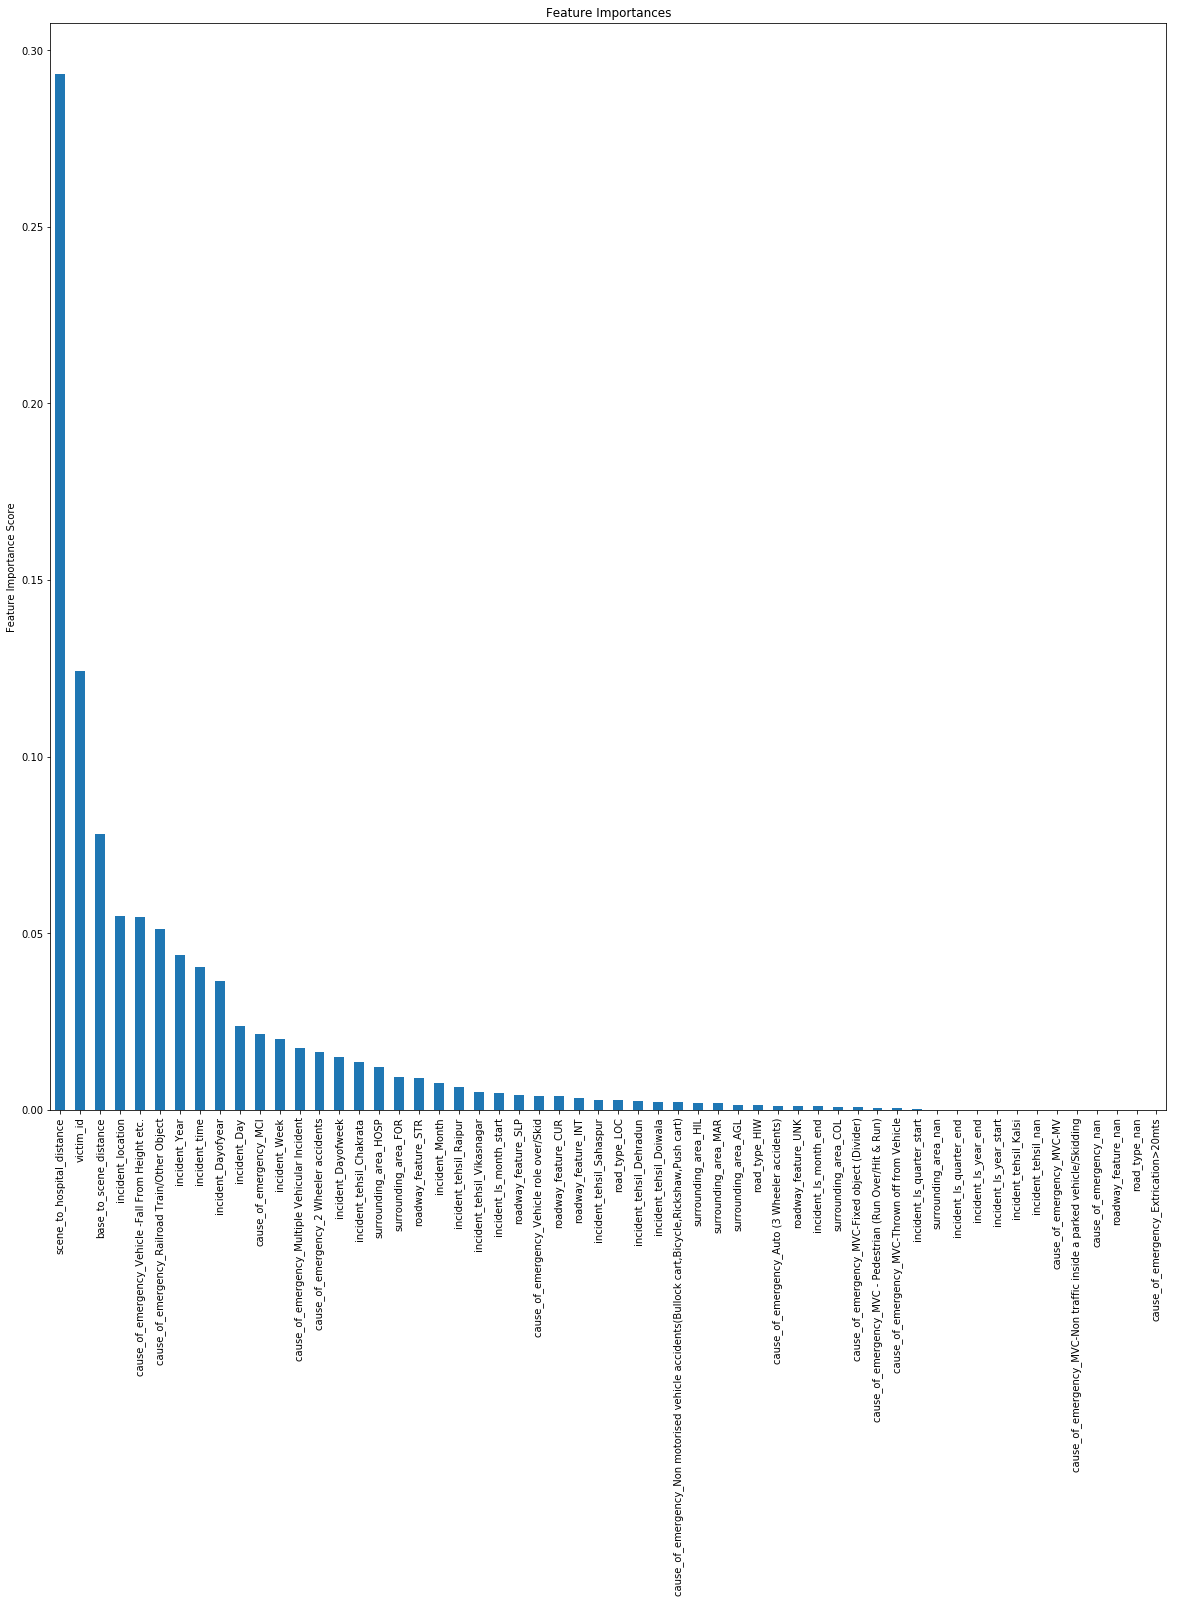

In [221]:
modelfit(gsearch3.best_estimator_, df, predictors)

In [223]:
#test 4
param_test4 = {'max_features': [7, 9, 11, 13, 15, 17, 19, 21]}
gsearch4 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split = 1000, n_estimators=70,max_depth=7,\
                                                               max_features='sqrt', subsample=0.8, random_state=10,min_samples_leaf = 50), 
param_grid = param_test4, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [224]:
gsearch4.fit(df[predictors], y )
gsearch4.grid_scores_, gsearch4.best_params_, gsearch4.best_score_

([mean: 0.78744, std: 0.02699, params: {'max_features': 7},
  mean: 0.78831, std: 0.02603, params: {'max_features': 9},
  mean: 0.78990, std: 0.02486, params: {'max_features': 11},
  mean: 0.79034, std: 0.02486, params: {'max_features': 13},
  mean: 0.79478, std: 0.02473, params: {'max_features': 15},
  mean: 0.79731, std: 0.02469, params: {'max_features': 17},
  mean: 0.79403, std: 0.02776, params: {'max_features': 19},
  mean: 0.79541, std: 0.02483, params: {'max_features': 21}],
 {'max_features': 17},
 0.7973140508980135)

In [227]:
#test 5
param_test5 = {'subsample':[0.6,0.7,0.75,0.8,0.85,0.9]}
gsearch5 = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05, min_samples_split = 1000, n_estimators=70,max_depth=7,\
                                                            subsample=0.8, \
                                                               random_state=10,min_samples_leaf = 50,max_features=17), 
param_grid = param_test5, scoring='roc_auc',n_jobs=4,iid=False, cv=5)

In [228]:
gsearch5.fit(df[predictors], y )
gsearch5.grid_scores_, gsearch5.best_params_, gsearch5.best_score_

([mean: 0.79196, std: 0.02388, params: {'subsample': 0.6},
  mean: 0.79809, std: 0.02678, params: {'subsample': 0.7},
  mean: 0.79499, std: 0.02698, params: {'subsample': 0.75},
  mean: 0.79731, std: 0.02469, params: {'subsample': 0.8},
  mean: 0.79579, std: 0.02545, params: {'subsample': 0.85},
  mean: 0.79430, std: 0.02638, params: {'subsample': 0.9}],
 {'subsample': 0.7},
 0.7980930249966234)


Model Report
Accuracy : 0.9666
AUC Score (Train): 0.982117
CV Score : Mean - 0.7730332 | Std - 0.02045937 | Min - 0.7509213 | Max - 0.8020239


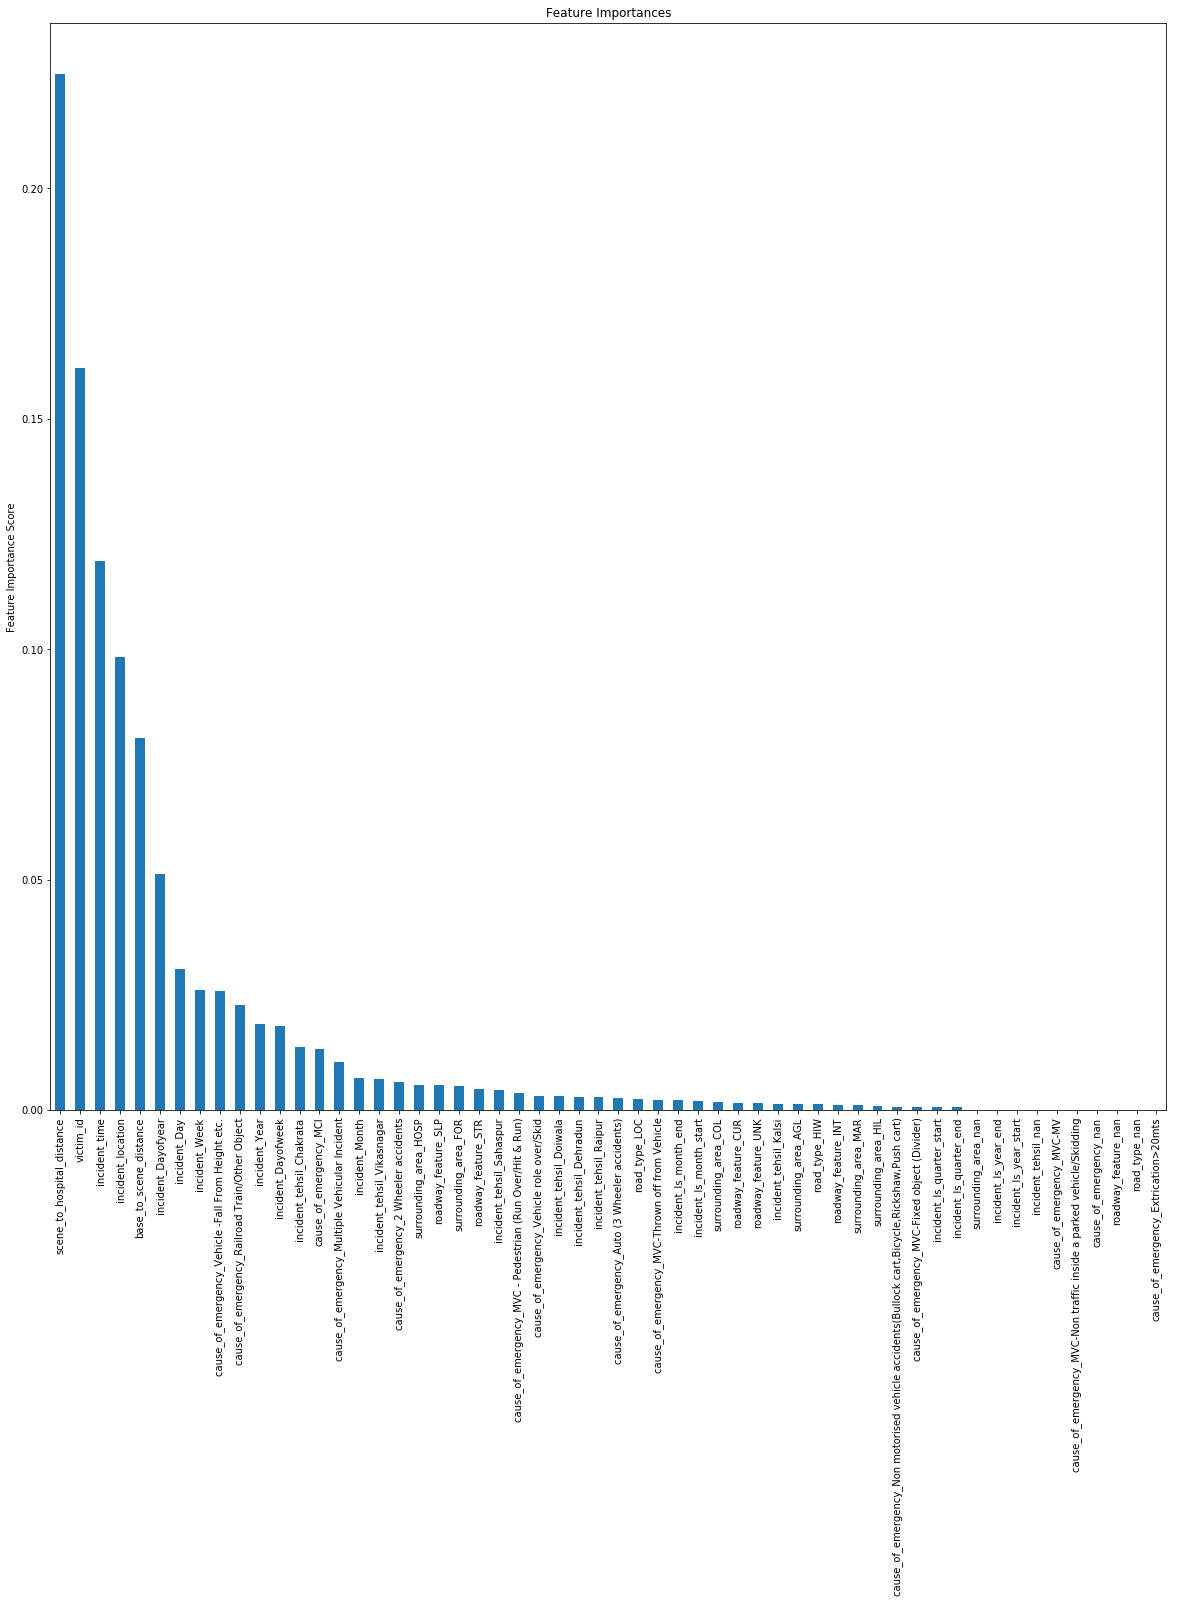

In [232]:
gbm_tuned_2 = GradientBoostingClassifier(learning_rate=0.05, min_samples_split = 1000, n_estimators=500,max_depth=10,\
                                        subsample=0.8, random_state=10,min_samples_leaf = 50,max_features=17)
modelfit(gbm_tuned_2, df, predictors)

In [235]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5048 entries, 0 to 5047
Data columns (total 22 columns):
victim_id                     5048 non-null category
incident_time                 5048 non-null category
incident_location             5048 non-null category
incident_tehsil               5048 non-null category
cause_of_emergency            5048 non-null category
base_to_scene_distance        5048 non-null int64
scene_to_hospital_distance    5048 non-null int64
roadway_feature               5048 non-null category
road_type                     5048 non-null category
surrounding_area              5048 non-null category
incident_Year                 5048 non-null int64
incident_Month                5048 non-null int64
incident_Week                 5048 non-null int64
incident_Day                  5048 non-null int64
incident_Dayofweek            5048 non-null int64
incident_Dayofyear            5048 non-null int64
incident_Is_month_end         5048 non-null bool
incident_Is_month_st

In [233]:
prediction_proba_2 = gbm_tuned_2.predict_proba(test)

ValueError: could not convert string to float: 'AGL'

In [ ]:
submit = make_submission(prediction_proba_2[:,1])